<a href="https://colab.research.google.com/github/alien-cyber/Butterfly-classification/blob/main/butterfly_classification_Googlecolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First lets download the dataset from kaggle

In [1]:
import os

os.environ['KAGGLE_USERNAME'] = 'your_Kaggle_username'
os.environ['KAGGLE_KEY'] = 'your_kaggle_apikey'


In [2]:
!kaggle datasets download -d bertcarremans/butterfly-images

 35% 5.00M/14.2M [00:00<00:00, 37.8MB/s]
100% 14.2M/14.2M [00:00<00:00, 75.0MB/s]


The downloaded data is in zip file to unzip it run the below code

In [3]:
import zipfile

# Define the path to your zip file
file_path = '/content/butterfly-images.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/butterfly')  # Replace 'destination_folder' with your

Lets viswalize the data

In [4]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [5]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        if len(images)>3:
            break
    fig=plt.figure(figsize=(3,4))
    xrange=range(1,3)

    for img,x in zip(images,xrange):
        ax=fig.add_subplot(2,2,x)
        ax.imshow(img)
        ax.set_title(img.shape)
    plt.show()

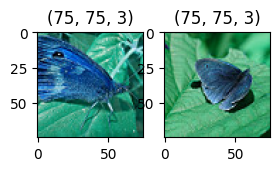

In [6]:
load_images("/content/butterfly/butterflies/train/maniola_jurtina")

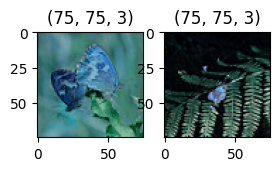

In [7]:
load_images("/content/butterfly/butterflies/train/pyronia_tithonus")

below code will be used to plot graphs

In [8]:
def plot_history(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']


    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')


    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()

**classification using Resnet50**

In [9]:
from tensorflow.keras import layers, models,optimizers
from keras.optimizers import Adam


In [10]:
from tensorflow.keras.applications import ResNet50

In [41]:
model_resnet = models.Sequential()
model_resnet.add(ResNet50(include_top=False,pooling="max",weights='imagenet'))
model_resnet.add(layers.Dense(1024,activation='sigmoid'))
model_resnet.add(layers.Dropout(0.3))
model_resnet.add(layers.Dense(1,activation='sigmoid'))
model_resnet.layers[0].trainable=False
model_resnet.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_18 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 25686913 (97.99 MB)
Trainable params: 2099201 (8.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [18]:
path_train = "/content/butterfly/butterflies/train"
files_train = os.listdir(path_train)

image_array_train=[]
label_array_train=[]
for i in range(len(files_train)):
  sub_file=os.listdir(path_train+'/'+files_train[i])
  for j in range(len(sub_file)):
    file_path=path_train+'/'+files_train[i]+'/'+sub_file[j]
    img=cv2.imread(file_path)

    image_array_train.append(img)
    label_array_train.append(i)
path_val = "/content/butterfly/butterflies/valid"
files_val = os.listdir(path_val)
image_array_val = []
label_array_val = []
for i in range(len(files_val)):
    sub_file = os.listdir(path_val + '/' + files_val[i])
    for j in range(len(sub_file)):
        file_path = path_val + '/' + files_val[i] + '/' + sub_file[j]
        img = cv2.imread(file_path)

        image_array_val.append(img)
        label_array_val.append(i)

In [22]:
import numpy as np
image_array_train = np.array(image_array_train)
label_array_train = np.array(label_array_train)

image_array_val = np.array(image_array_val)
label_array_val = np.array(label_array_val)

In [13]:
import tensorflow as tf
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    factor = 0.9,
    monitor = "val_accuracy",
    mode = "auto",
    cooldown = 0,
    patience = 1,
    verbose = 1,
    min_lr = 1e-6
)


Epoch 1/15
28/29 [===========================>..] - ETA: 0s - loss: 0.2719 - accuracy: 0.8951

29/29 [==============================] - 6s 83ms/step - loss: 0.2719 - accuracy: 0.8956 - val_loss: 0.5383 - val_accuracy: 0.7333 - lr: 1.0000e-04
Epoch 2/15
27/29 [==========================>...] - ETA: 0s - loss: 0.2314 - accuracy: 0.9242

29/29 [==============================] - 1s 45ms/step - loss: 0.2296 - accuracy: 0.9239 - val_loss: 0.5425 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 3/15
29/29 [==============================] - ETA: 0s - loss: 0.2102 - accuracy: 0.9300


Epoch 3: ReduceLROnPlateau reducing learning rate to 8.999999772640876e-05.
29/29 [==============================] - 1s 46ms/step - loss: 0.2102 - accuracy: 0.9300 - val_loss: 0.5451 - val_accuracy: 0.7483 - lr: 1.0000e-04
Epoch 4/15
29/29 [==============================] - ETA: 0s - loss: 0.1896 - accuracy: 0.9517

29/29 [==============================] - 2s 59ms/step - loss: 0.1896 - accuracy: 0.9517 - val_loss: 0.5331 - val_accuracy: 0.7583 - lr: 9.0000e-05
Epoch 5/15
29/29 [==============================] - ETA: 0s - loss: 0.1710 - accuracy: 0.9594


Epoch 5: ReduceLROnPlateau reducing learning rate to 8.100000122794882e-05.
29/29 [==============================] - 1s 48ms/step - loss: 0.1710 - accuracy: 0.9594 - val_loss: 0.5377 - val_accuracy: 0.7550 - lr: 9.0000e-05
Epoch 6/15
29/29 [==============================] - ETA: 0s - loss: 0.1633 - accuracy: 0.9622


Epoch 6: ReduceLROnPlateau reducing learning rate to 7.289999848580919e-05.
29/29 [==============================] - 1s 46ms/step - loss: 0.1633 - accuracy: 0.9622 - val_loss: 0.5430 - val_accuracy: 0.7467 - lr: 8.1000e-05
Epoch 7/15
29/29 [==============================] - ETA: 0s - loss: 0.1466 - accuracy: 0.9689


Epoch 7: ReduceLROnPlateau reducing learning rate to 6.56100019114092e-05.
29/29 [==============================] - 1s 46ms/step - loss: 0.1466 - accuracy: 0.9689 - val_loss: 0.5410 - val_accuracy: 0.7583 - lr: 7.2900e-05
Epoch 8/15
29/29 [==============================] - ETA: 0s - loss: 0.1362 - accuracy: 0.9744


Epoch 8: ReduceLROnPlateau reducing learning rate to 5.904900172026828e-05.
29/29 [==============================] - 1s 46ms/step - loss: 0.1362 - accuracy: 0.9744 - val_loss: 0.5456 - val_accuracy: 0.7533 - lr: 6.5610e-05
Epoch 9/15
29/29 [==============================] - ETA: 0s - loss: 0.1354 - accuracy: 0.9739


Epoch 9: ReduceLROnPlateau reducing learning rate to 5.314410154824145e-05.
29/29 [==============================] - 1s 45ms/step - loss: 0.1354 - accuracy: 0.9739 - val_loss: 0.5449 - val_accuracy: 0.7567 - lr: 5.9049e-05
Epoch 10/15
29/29 [==============================] - ETA: 0s - loss: 0.1223 - accuracy: 0.9783


Epoch 10: ReduceLROnPlateau reducing learning rate to 4.7829690083744934e-05.
29/29 [==============================] - 1s 45ms/step - loss: 0.1223 - accuracy: 0.9783 - val_loss: 0.5465 - val_accuracy: 0.7567 - lr: 5.3144e-05
Epoch 11/15
29/29 [==============================] - ETA: 0s - loss: 0.1157 - accuracy: 0.9850


Epoch 11: ReduceLROnPlateau reducing learning rate to 4.304672074795235e-05.
29/29 [==============================] - 1s 46ms/step - loss: 0.1157 - accuracy: 0.9850 - val_loss: 0.5540 - val_accuracy: 0.7567 - lr: 4.7830e-05
Epoch 12/15
29/29 [==============================] - ETA: 0s - loss: 0.1133 - accuracy: 0.9789


Epoch 12: ReduceLROnPlateau reducing learning rate to 3.8742047036066654e-05.
29/29 [==============================] - 1s 46ms/step - loss: 0.1133 - accuracy: 0.9789 - val_loss: 0.5551 - val_accuracy: 0.7550 - lr: 4.3047e-05
Epoch 13/15
29/29 [==============================] - ETA: 0s - loss: 0.1094 - accuracy: 0.9844


Epoch 13: ReduceLROnPlateau reducing learning rate to 3.4867842987296176e-05.
29/29 [==============================] - 1s 48ms/step - loss: 0.1094 - accuracy: 0.9844 - val_loss: 0.5564 - val_accuracy: 0.7500 - lr: 3.8742e-05
Epoch 14/15
29/29 [==============================] - ETA: 0s - loss: 0.1052 - accuracy: 0.9867


Epoch 14: ReduceLROnPlateau reducing learning rate to 3.138105967082083e-05.
29/29 [==============================] - 2s 61ms/step - loss: 0.1052 - accuracy: 0.9867 - val_loss: 0.5596 - val_accuracy: 0.7517 - lr: 3.4868e-05
Epoch 15/15
29/29 [==============================] - ETA: 0s - loss: 0.1021 - accuracy: 0.9883


Epoch 15: ReduceLROnPlateau reducing learning rate to 2.824295370373875e-05.
29/29 [==============================] - 1s 46ms/step - loss: 0.1021 - accuracy: 0.9883 - val_loss: 0.5573 - val_accuracy: 0.7583 - lr: 3.1381e-05


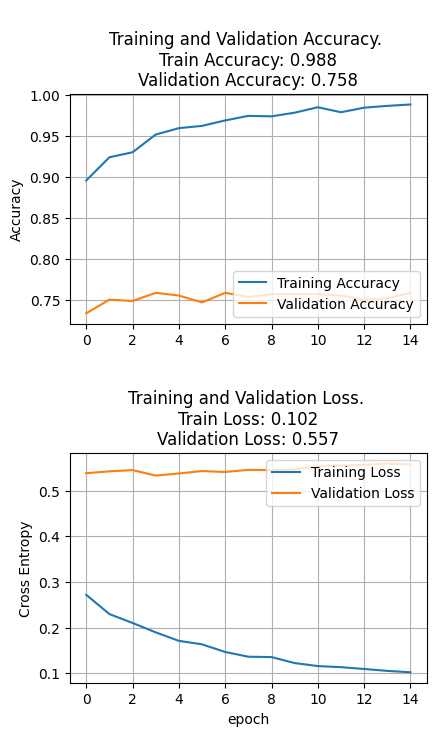

In [43]:
learning_rate = 0.0001
adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
model_resnet.compile(optimizer=adam_optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
Batch_Size=64
Epochs=15
history = model_resnet.fit(image_array_train, label_array_train, validation_data=(image_array_val,label_array_val), batch_size=Batch_Size, epochs=Epochs,callbacks=[reduce_lr] )
plot_history(history)

**Classification using VGG16**

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import RMSprop


In [39]:
model_vgg=models.Sequential()
model_vgg.add(VGG16(weights='imagenet',input_shape = (75,75, 3),include_top=False))
model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(1024,activation='sigmoid'))
model_vgg.add(layers.Dropout(0.4))
model_vgg.add(layers.Dense(1,activation='sigmoid'))
model_vgg.layers[0].trainable=False
model_vgg.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 16813889 (64.14 MB)
Trainable params: 2099201 (8.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Epoch 1/15
28/29 [===========================>..] - ETA: 0s - loss: 0.6456 - accuracy: 0.6507

29/29 [==============================] - 3s 63ms/step - loss: 0.6448 - accuracy: 0.6517 - val_loss: 0.5881 - val_accuracy: 0.6850 - lr: 1.0000e-04
Epoch 2/15
29/29 [==============================] - ETA: 0s - loss: 0.4549 - accuracy: 0.7872

29/29 [==============================] - 2s 64ms/step - loss: 0.4549 - accuracy: 0.7872 - val_loss: 0.5785 - val_accuracy: 0.7017 - lr: 1.0000e-04
Epoch 3/15
29/29 [==============================] - ETA: 0s - loss: 0.3501 - accuracy: 0.8489

29/29 [==============================] - 2s 55ms/step - loss: 0.3501 - accuracy: 0.8489 - val_loss: 0.5752 - val_accuracy: 0.7150 - lr: 1.0000e-04
Epoch 4/15
29/29 [==============================] - ETA: 0s - loss: 0.2865 - accuracy: 0.8944

29/29 [==============================] - 2s 54ms/step - loss: 0.2865 - accuracy: 0.8944 - val_loss: 0.5794 - val_accuracy: 0.7233 - lr: 1.0000e-04
Epoch 5/15
29/29 [==============================] - ETA: 0s - loss: 0.2509 - accuracy: 0.9122


Epoch 5: ReduceLROnPlateau reducing learning rate to 8.999999772640876e-05.
29/29 [==============================] - 2s 64ms/step - loss: 0.2509 - accuracy: 0.9122 - val_loss: 0.5861 - val_accuracy: 0.7217 - lr: 1.0000e-04
Epoch 6/15
29/29 [==============================] - ETA: 0s - loss: 0.2121 - accuracy: 0.9344

29/29 [==============================] - 2s 63ms/step - loss: 0.2121 - accuracy: 0.9344 - val_loss: 0.5969 - val_accuracy: 0.7250 - lr: 9.0000e-05
Epoch 7/15
29/29 [==============================] - ETA: 0s - loss: 0.1734 - accuracy: 0.9539


Epoch 7: ReduceLROnPlateau reducing learning rate to 8.100000122794882e-05.
29/29 [==============================] - 2s 55ms/step - loss: 0.1734 - accuracy: 0.9539 - val_loss: 0.6038 - val_accuracy: 0.7133 - lr: 9.0000e-05
Epoch 8/15
28/29 [===========================>..] - ETA: 0s - loss: 0.1553 - accuracy: 0.9654


Epoch 8: ReduceLROnPlateau reducing learning rate to 7.289999848580919e-05.
29/29 [==============================] - 2s 56ms/step - loss: 0.1550 - accuracy: 0.9656 - val_loss: 0.6178 - val_accuracy: 0.7217 - lr: 8.1000e-05
Epoch 9/15
29/29 [==============================] - ETA: 0s - loss: 0.1368 - accuracy: 0.9711

29/29 [==============================] - 2s 56ms/step - loss: 0.1368 - accuracy: 0.9711 - val_loss: 0.6229 - val_accuracy: 0.7267 - lr: 7.2900e-05
Epoch 10/15
29/29 [==============================] - ETA: 0s - loss: 0.1245 - accuracy: 0.9739


Epoch 10: ReduceLROnPlateau reducing learning rate to 6.56100019114092e-05.
29/29 [==============================] - 2s 55ms/step - loss: 0.1245 - accuracy: 0.9739 - val_loss: 0.6228 - val_accuracy: 0.7183 - lr: 7.2900e-05
Epoch 11/15
29/29 [==============================] - ETA: 0s - loss: 0.1114 - accuracy: 0.9794

29/29 [==============================] - 2s 64ms/step - loss: 0.1114 - accuracy: 0.9794 - val_loss: 0.6427 - val_accuracy: 0.7283 - lr: 6.5610e-05
Epoch 12/15
29/29 [==============================] - ETA: 0s - loss: 0.1020 - accuracy: 0.9806


Epoch 12: ReduceLROnPlateau reducing learning rate to 5.904900172026828e-05.
29/29 [==============================] - 2s 65ms/step - loss: 0.1020 - accuracy: 0.9806 - val_loss: 0.6358 - val_accuracy: 0.7183 - lr: 6.5610e-05
Epoch 13/15
28/29 [===========================>..] - ETA: 0s - loss: 0.0952 - accuracy: 0.9900

29/29 [==============================] - 2s 65ms/step - loss: 0.0952 - accuracy: 0.9900 - val_loss: 0.6498 - val_accuracy: 0.7367 - lr: 5.9049e-05
Epoch 14/15
29/29 [==============================] - ETA: 0s - loss: 0.0850 - accuracy: 0.9872


Epoch 14: ReduceLROnPlateau reducing learning rate to 5.314410154824145e-05.
29/29 [==============================] - 2s 55ms/step - loss: 0.0850 - accuracy: 0.9872 - val_loss: 0.6553 - val_accuracy: 0.7217 - lr: 5.9049e-05
Epoch 15/15
29/29 [==============================] - ETA: 0s - loss: 0.0777 - accuracy: 0.9894


Epoch 15: ReduceLROnPlateau reducing learning rate to 4.7829690083744934e-05.
29/29 [==============================] - 2s 54ms/step - loss: 0.0777 - accuracy: 0.9894 - val_loss: 0.6621 - val_accuracy: 0.7233 - lr: 5.3144e-05


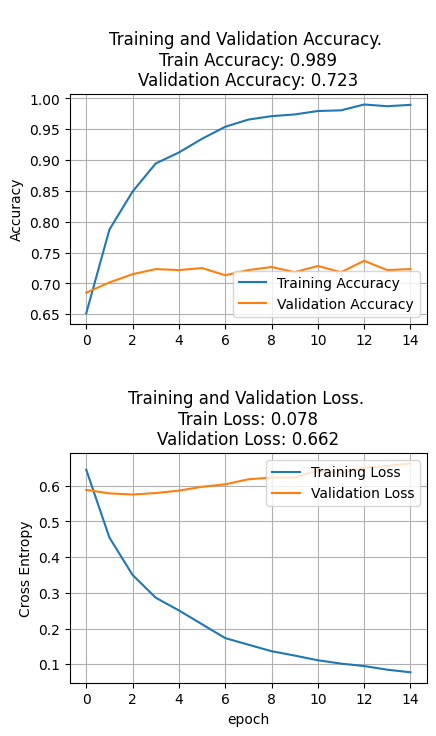

In [40]:
learning_rate = 0.0001
rmsprop_optimizer = RMSprop(learning_rate=learning_rate)
model_vgg.compile(optimizer=rmsprop_optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
Epochs=15
history = model_vgg.fit(image_array_train, label_array_train, validation_data=(image_array_val,label_array_val), batch_size=Batch_Size, epochs=Epochs,callbacks=[reduce_lr] )
plot_history(history)

**classification with InceptionV3**

In [44]:
from tensorflow.keras.applications import InceptionV3

In [67]:
model_inception = models.Sequential()
model_inception.add(InceptionV3(weights='imagenet', input_shape=(75, 75, 3), include_top=False))
model_inception.add(layers.GlobalMaxPooling2D())
model_inception.add(layers.Dense(1024, activation='sigmoid', use_bias=False))
model_inception.add(layers.Dropout(0.4))
model_inception.add(layers.Dense(1, activation='sigmoid', use_bias=False))
model_inception.layers[0].trainable = False

model_inception.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_max_pooling2d_3 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
 dense_46 (Dense)            (None, 1024)              2097152   
                                                                 
 dropout_22 (Dropout)        (None, 1024)              0         
                                                                 
 dense_47 (Dense)            (None, 1)                 1024      
                                                                 
Total params: 23900960 (91.17 MB)
Trainable params: 2098176 (8.00 MB)
Non-trainable params: 21802784 (83.17 MB)
_______

Epoch 1/15
29/29 [==============================] - 7s 83ms/step - loss: 0.7612 - accuracy: 0.5478 - val_loss: 0.6597 - val_accuracy: 0.6167 - lr: 1.0000e-04
Epoch 2/15
28/29 [===========================>..] - ETA: 0s - loss: 0.6745 - accuracy: 0.6133
Epoch 2: ReduceLROnPlateau reducing learning rate to 8.999999772640876e-05.
29/29 [==============================] - 1s 30ms/step - loss: 0.6758 - accuracy: 0.6128 - val_loss: 0.6682 - val_accuracy: 0.5900 - lr: 1.0000e-04
Epoch 3/15
28/29 [===========================>..] - ETA: 0s - loss: 0.6600 - accuracy: 0.6138
Epoch 3: ReduceLROnPlateau reducing learning rate to 8.100000122794882e-05.
29/29 [==============================] - 1s 31ms/step - loss: 0.6592 - accuracy: 0.6144 - val_loss: 0.6659 - val_accuracy: 0.6133 - lr: 9.0000e-05
Epoch 4/15
28/29 [===========================>..] - ETA: 0s - loss: 0.6336 - accuracy: 0.6507
Epoch 4: ReduceLROnPlateau reducing learning rate to 7.289999848580919e-05.
29/29 [==============================]

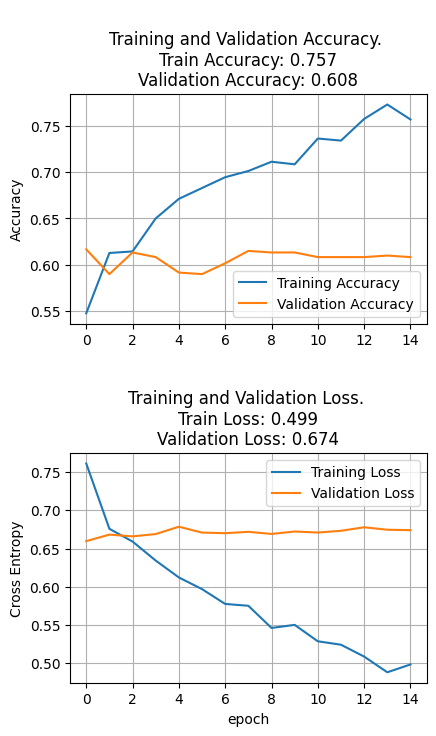

In [68]:
learning_rate = 0.0001
Adam_optimizer = Adam(learning_rate=learning_rate)
model_inception.compile(optimizer=Adam_optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
Epochs=15
history = model_inception.fit(image_array_train, label_array_train, validation_data=(image_array_val,label_array_val), batch_size=Batch_Size, epochs=Epochs,callbacks=[reduce_lr] )
plot_history(history)